# Image descriptor Matching

The objectives of this notebook includes:
* Matching images using local descriptors
* Comparing images via descriptor matching

Import the OpenCV & Numpy Libraries and read in refere4nce image

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

img = cv.imread('./resources/empire.jpg')
img_45 = cv.imread('./resources/empire_45.jpg')
img_zoomedout = cv.imread('./resources/empire_zoomedout.jpg')
img_another = cv.imread('./resources/fisherman.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY)
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY)
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY)

## 1. Matching images using local descriptors

In [3]:
sift = cv.xfeatures2d.SIFT_create()


kp, des = sift.detectAndCompute(img_gray, None)
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None)
kp_another, des_another = sift.detectAndCompute(img_another_gray, None)

### Brute force Matcher

In [4]:
bf = cv.BFMatcher()
train = des_45
query = des
matches_des_des_45 = bf.match(query, train)

In [5]:
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

Draw the matches on the images and link using lines to visualise the match.

The below image was obtained by using local image descriptors matching top-10 points of interest using SIFT.

True

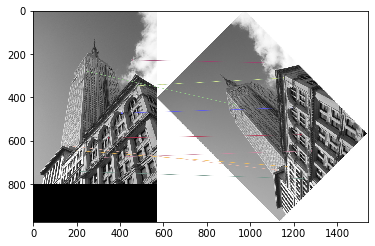

In [8]:
nBestMatches = 10
matching_des_des_45 = cv.drawMatches(img_gray, kp, img_45_gray, kp_45,
                                     matches_des_des_45[:nBestMatches],
                                     None,
                                     flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matching_des_des_45)
cv.imwrite('matching_des_des_45.png', matching_des_des_45)

Print out the ten best matches and their coordinates

In [15]:
kp_train = kp_45
kp_query = kp
for i in range (0, nBestMatches):
    print(f"""match {i} info
    \tdistance: {matches_des_des_45[i].distance}
    \tkeypoint in train: ID: {matches_des_des_45[i].trainIdx}  x:{kp_train[matches_des_des_45[i].trainIdx].pt[0]} y: {kp_train[matches_des_des_45[i].trainIdx].pt[1]}
    \tkeypoint in query: ID: {matches_des_des_45[i].queryIdx} x: {kp_query[matches_des_des_45[i].queryIdx].pt[0]} y: {kp_query[matches_des_des_45[i].queryIdx].pt[1]}
    """)

match 0 info
    	distance: 9.380831718444824
    	keypoint in train: ID: 2443  x:677.6953125 y: 773.8291015625
    	keypoint in query: ID: 661 x: 215.93626403808594 y: 740.7075805664062
    
match 1 info
    	distance: 9.69536018371582
    	keypoint in train: ID: 2356  x:663.0458984375 y: 571.4856567382812
    	keypoint in query: ID: 1721 x: 348.70166015625 y: 587.2408447265625
    
match 2 info
    	distance: 11.747340202331543
    	keypoint in train: ID: 963  x:487.3556823730469 y: 240.71566772460938
    	keypoint in query: ID: 2328 x: 458.2903747558594 y: 229.11865234375
    
match 3 info
    	distance: 12.206555366516113
    	keypoint in train: ID: 2080  x:624.6529541015625 y: 447.94830322265625
    	keypoint in query: ID: 2090 x: 408.8612060546875 y: 472.7430419921875
    
match 4 info
    	distance: 12.961481094360352
    	keypoint in train: ID: 1525  x:549.510498046875 y: 733.697998046875
    	keypoint in query: ID: 101 x: 153.57797241210938 y: 621.663818359375
    
match 5 inf

Draw the matches on the images and link using lines to visualise the match.

True

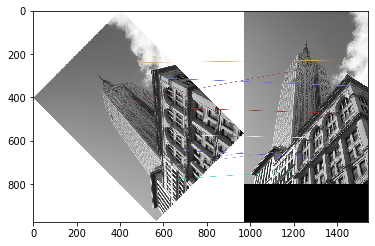

In [51]:
matches_des_45_des = bf.match(des_45, des)
matches_des_45_des = sorted(matches_des_45_des, key = lambda x:x.distance)
matching_des_45_des = cv.drawMatches(img_45_gray, kp_45, img_gray, kp,
                                     matches_des_45_des[:nBestMatches],
                                     None,
                                     flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matching_des_45_des)
cv.imwrite('matching_des_45_des.png', matching_des_45_des)

True

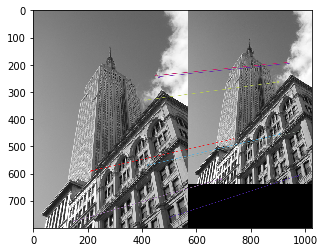

In [84]:
matches_des_zoomedout = bf.match(des, des_zoomedout)
matches_des_zoomedout = sorted(matches_des_zoomedout, key = lambda x:x.distance)
matching_des_zoomedout = cv.drawMatches(img_gray, kp, img_zoomedout_gray, kp_zoomedout,
                                     matches_des_zoomedout[:nBestMatches],
                                     None,
                                     flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matching_des_zoomedout)
cv.imwrite('matching_des_zoomedout.png', matching_des_zoomedout)

True

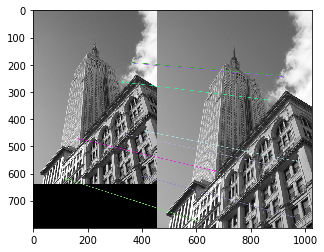

In [86]:
matches_zoomedout_des = bf.match(des_zoomedout, des)
matches_zoomedout_des = sorted(matches_zoomedout_des, key = lambda x:x.distance)
matching_zoomedout_des = cv.drawMatches(img_zoomedout_gray, kp_zoomedout, img_gray, kp,
                                     matches_zoomedout_des[:nBestMatches],
                                     None,
                                     flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matching_zoomedout_des)
cv.imwrite('matching_zoomedout_des.png', matching_zoomedout_des)

## 2. Comparing images using descriptor matching

Make a small function to compare images and print the score.

In [39]:
def compare_descriptors(des1, des2, top_n):
    matches_des1_des2 = bf.match(des1, des2)
    matches_des1_des2 = sorted(matches_des1_des2, key = lambda x:x.distance)
    matches_des1_des2 = matches_des1_des2[:top_n]

    matches_des2_des1 = bf.match(des2, des1)
    matches_des2_des1 = sorted(matches_des2_des1, key = lambda x:x.distance)
    matches_des2_des1 = matches_des2_des1[:top_n]

    total = 0

    for i in range(0, top_n) :
        total += matches_des1_des2[i].distance + matches_des2_des1[i].distance
        total = total/2
        
    return total
    

Empire.jpg was compared with 3 other images using the descriptors matching. The distance between each set of matching descriptors was compared using the OpenCV library. The distance calculation is not symmetric and as a result the avg distances was computed using distances from A to B and B to A. The number of matches used to calculate the similarity score was varied between 5 and 25 in increments of 2. The full output can be seen in the section below.

In [56]:
columns = ['images' , 'topn', 'score']
df = pd.DataFrame(columns=columns)

In [65]:
for i in range (5, 26, 2):
    df = df.append({'images' : 'empire.jpg vs empire_45.jpg' , 'topn' : i, 'score': compare_descriptors(des, des_45, i)} , ignore_index=True)
    df = df.append({'images' : 'empire.jpg vs empire_zoomedout.jpg' , 'topn' : i, 'score': compare_descriptors(des, des_zoomedout, i)} , ignore_index=True)
    df = df.append({'images' : 'empire.jpg vs fisherman.jpg' , 'topn' : i, 'score': compare_descriptors(des, des_another, i)} , ignore_index=True)
    
    print(f"""
    Comparison using top {i} matches
    {"-" * 90}
    empire.jpg vs empire_45.jpg - score: {compare_descriptors(des, des_45, i):.2f}
    empire.jpg vs empire_zoomedout.jpg - score: {compare_descriptors(des, des_zoomedout, i):.2f}
    empire.jpg vs fisherman.jpg - score: {compare_descriptors(des, des_another, i):.2f}""")

df['topn'] = pd.to_numeric(df['topn'])


    Comparison using top 5 matches
    ------------------------------------------------------------------------------------------
    empire.jpg vs empire_45.jpg - score: 23.80
    empire.jpg vs empire_zoomedout.jpg - score: 20.95
    empire.jpg vs fisherman.jpg - score: 159.02

    Comparison using top 7 matches
    ------------------------------------------------------------------------------------------
    empire.jpg vs empire_45.jpg - score: 26.31
    empire.jpg vs empire_zoomedout.jpg - score: 23.79
    empire.jpg vs fisherman.jpg - score: 178.80

    Comparison using top 9 matches
    ------------------------------------------------------------------------------------------
    empire.jpg vs empire_45.jpg - score: 27.84
    empire.jpg vs empire_zoomedout.jpg - score: 26.11
    empire.jpg vs fisherman.jpg - score: 195.58

    Comparison using top 11 matches
    ------------------------------------------------------------------------------------------
    empire.jpg vs empire_45.

**Results**

Empire.jpg was most similar (smallest score) with empire_zoomedout.jpg in all iterations. As more matches were added, the scores increased. This is to be expected as an increase in matches added additional values in the summation of the scores. The below plot shows the change in similarity score over top-n iterations.

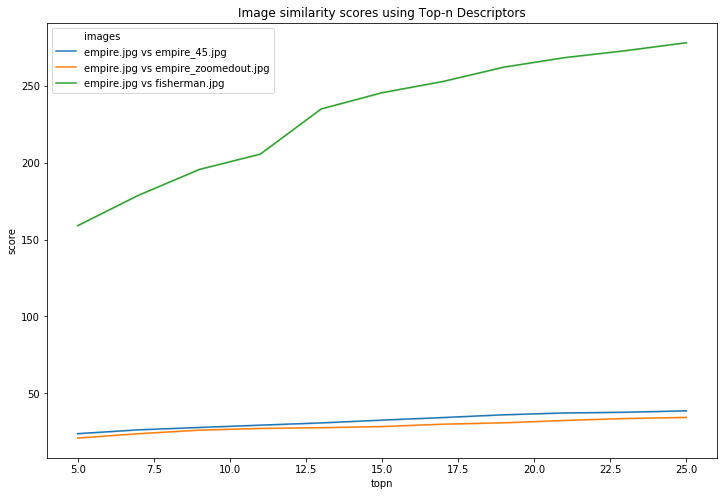

In [82]:
plt.figure(figsize=(12,8))
plt.title('Image similarity scores using Top-n Descriptors')
sns.lineplot(y='score', x='topn', data=df, hue='images')
plt.savefig('score_comparison.png')